#  **Unsupervised_Learning_Project: Team JB3**

### **Building an Anime Recommendation System**

<div align="center" style="font-size: 40%; text-align: center; margin: 0 auto">
    <img src="https://mcdn.wallpapersafari.com/medium/67/98/JKSuGa.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 800px; height: 200px;" />
</div>


# **Project Overview**

## **Introduction**

Anime has become a global phenomenon, captivating audiences with its unique storytelling, diverse genres, and vibrant characters. With an ever-growing collection of anime titles available, it can be challenging for viewers to discover new series that align with their tastes.
- This project aims to solve this problem by developing a robust anime recommendation system that leverages both collaborative filtering and content-based filtering techniques to accurately predict how a user will rate an anime title they have not yet viewed.

## **Objective**

The primary objective of this project is to create an end-to-end recommendation system capable of providing personalized anime recommendations to users. This involves:

- **Data Loading and Preprocessing**: Cleaning and preparing the datasets for analysis.
- **Collaborative Filtering Model**: Using user ratings to recommend anime titles.
- **Content-Based Filtering Model**: Utilizing anime metadata to find similar titles.
- **Hybrid Recommender System**: Combining collaborative and content-based models for enhanced accuracy.
- **Model Evaluation**: Assessing the performance of the models using relevant metrics.
- **Deployment**: Deploying the recommendation system as a web application for easy user access.

## **Loading Packages**

In [332]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Data Loading**

**Data Sources**

The project uses three primary datasets:

- **anime.csv**: Contains information about anime titles, including genres, type, number of episodes, average rating, and number of members.
- **train.csv**:This file contains rating data, supplied by individual users for individual anime titles. It contains user_id information, the anime_id of the title watched, and the rating given (if applicable).
- **test.csv**: This file will be used to create the final submission. It contains a user_id and an anime_id column only - no rating (that's your task!). These ids will be used to create the rating predictions.

In [333]:
anime_df = pd.read_csv('anime-recommender-system-project-2024/anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [334]:
test_df= pd.read_csv('anime-recommender-system-project-2024/test.csv')
test_df.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


In [335]:
train_df =pd.read_csv('anime-recommender-system-project-2024/train.csv')
train_df.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


# **Data Cleaning**

Data cleaning is a critical process that underpins the success of any data analysis or machine learning project. By improving data quality, enhancing model performance, reducing bias and overfitting, facilitating effective unsupervised learning, increasing data usability, saving time and resources, and enhancing trust and credibility, data cleaning ensures that the insights derived from data are accurate, reliable, and actionable.

In [336]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


There are 12294 entries, indicating the dataset covers a significant number of anime series.
anime_id, name, episodes, and members columns have no missing values.
genre, type, and rating columns have some missing values.
genre has 62 missing values.
type has 25 missing values.
rating has 230 missing values.
The episodes column is an object type, which suggests it may contain non-numeric values (e.g., 'Unknown') or requires conversion to numeric type.

In [337]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB


There are 633686 entries, indicating a large dataset of user-anime interactions.
No missing values are present in this DataFrame.
Both columns (user_id and anime_id) are integer types, which is appropriate for identifiers.

In [338]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB


There are 5703554 entries, which is significantly larger than the test set, suggesting a comprehensive training dataset.
No missing values are present in this DataFrame.
All columns are integer types, which is appropriate for identifiers and ratings.

## **Handling Missing Values, Removing Duplicates and Type Convertion**

For **`anime_df`:**

**`genre`**, **`type`**, and **`rating`** columns have missing values. we handle these missing values by:

Imputing with the most frequent value, mean, or a specific placeholder.

Dropping rows with missing values if they are not significant in number.

**Data Types**

The **`episodes`** column in **`anime_df`** should be checked for non-numeric values and converted to integers if possible.

In [339]:
import pandas as pd

# Load data (replace 'your_file.csv' with the actual file paths)
anime_df = pd.read_csv('anime-recommender-system-project-2024/anime.csv')
test_df = pd.read_csv('anime-recommender-system-project-2024/test.csv')
train_df = pd.read_csv('anime-recommender-system-project-2024/train.csv')

# Clean anime_df
anime_df.drop_duplicates(inplace=True)
anime_df['genre'].fillna('Unknown', inplace=True)
anime_df['type'].fillna('Unknown', inplace=True)
anime_df['rating'].fillna(anime_df['rating'].mean(), inplace=True)
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce').fillna(0).astype(int)

# Clean test_df
test_df.drop_duplicates(inplace=True)

# Clean train_df
train_df.drop_duplicates(inplace=True)
train_df['rating'].fillna(train_df['rating'].mean(), inplace=True)

# Check the cleaned data
print(anime_df.info())
print(test_df.info())
print(train_df.info())


C:\Users\dell\AppData\Local\Temp\ipykernel_14864\3537346915.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\dell\AppData\Local\Temp\ipykernel_14864\3537346915.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  int32  
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 624.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 5703553 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   use

C:\Users\dell\AppData\Local\Temp\ipykernel_14864\3537346915.py:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.







**Removing Duplicates**: Ensures that each record in the dataset is unique, preventing redundant or misleading data points from skewing the analysis.

**Handling Missing Values**: Fills missing values with appropriate substitutes to maintain data integrity. Missing genres and types are filled with 'Unknown', missing ratings are filled with the mean rating, and non-numeric episodes are coerced to 0.

**Type Conversion**: Converts the episodes column to numeric values, treating non-numeric entries as 0 to ensure consistent data types.

These steps will help ensure that the datasets are clean, reducing the risk of errors or biases in subsequent analysis or modeling tasks.

1. **Key Insights for anime_df**
**Complete Data:** No missing values across all columns, which simplifies preprocessing.

**Data Types:**
**Numeric columns** (anime_id, episodes, rating, members) are correctly typed for analysis.

**Categorical columns** (name, genre, type) are strings, which may require encoding for certain types of analysis.

Memory Efficiency: The DataFrame uses a moderate amount of memory (672.5 KB).

**2. Key Insights for test_df**

**Complete Data**: No missing values across both columns.

**Data Types:**
Both columns are correctly typed as integers, suitable for analysis and modeling.

**Memory Efficiency**: The DataFrame uses a moderate amount of memory (9.7 MB), considering its size.

**3. Key Insights for train_df**

**Complete Data:** No missing values across all columns.

**Data Types:**
All columns are correctly typed as integers, which is suitable for analysis and modeling.

**Memory Usage**: The DataFrame uses a significant amount of memory (174.1 MB) due to its large size.

## **Convert Categorical Variables**

In [340]:
anime_df = pd.get_dummies(anime_df, columns=['genre', 'type'], drop_first=True)


## **Outlier Detection and Removal**

In [341]:
from scipy import stats
import numpy as np

def remove_outliers_zscore(df, column_name):
    z_scores = np.abs(stats.zscore(df[column_name]))
    df = df[(z_scores < 3)]
    return df

# Apply to anime_df for 'rating' and 'members'
anime_df = remove_outliers_zscore(anime_df, 'rating')
anime_df = remove_outliers_zscore(anime_df, 'members')

# Apply to train_df for 'rating'
train_df = remove_outliers_zscore(train_df, 'rating')


**Data Integrity**

Ensure the integrity and consistency of the user-anime interactions by cross-referencing **`anime_id`** in **`test_df`**and **`train_df`** with `anime_df` to confirm that all referenced anime exist in **`anime_df`**.

In [342]:
# Cross-referencing anime_id
valid_anime_ids = set(anime_df['anime_id'])
test_df = test_df[test_df['anime_id'].isin(valid_anime_ids)]
train_df = train_df[train_df['anime_id'].isin(valid_anime_ids)]


In [343]:
print(anime_df.describe())
print(anime_df.info())

print(train_df.describe())
print(train_df.info())


           anime_id      episodes        rating        members
count  11965.000000  11965.000000  11965.000000   11965.000000
mean   14034.817802     11.789553      6.460452   11803.930631
std    11452.410768     46.391173      0.964119   26371.582656
min        5.000000      0.000000      3.430000       5.000000
25%     3482.000000      1.000000      5.900000     221.000000
50%    10210.000000      2.000000      6.530000    1470.000000
75%    24785.000000     12.000000      7.130000    8228.000000
max    34527.000000   1818.000000      9.500000  182713.000000
<class 'pandas.core.frame.DataFrame'>
Index: 11965 entries, 2 to 12293
Columns: 3275 entries, anime_id to type_Unknown
dtypes: bool(3270), float64(1), int32(1), int64(2), object(1)
memory usage: 37.8+ MB
None
            user_id      anime_id        rating
count  3.590690e+06  3.590690e+06  3.590690e+06
mean   3.698577e+04  8.586914e+03  7.652673e+00
std    2.093476e+04  8.855707e+03  1.453376e+00
min    3.000000e+00  5.000000e+0

# **EDA**

In [344]:
!pip install pandas matplotlib seaborn

Train DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703554 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None
            user_id      anime_id        rating
count  5.703554e+06  5.703554e+06  5.703554e+06
mean   3.674460e+04  8.902143e+03  7.808691e+00
std    2.101174e+04  8.882175e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01

Test DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dt

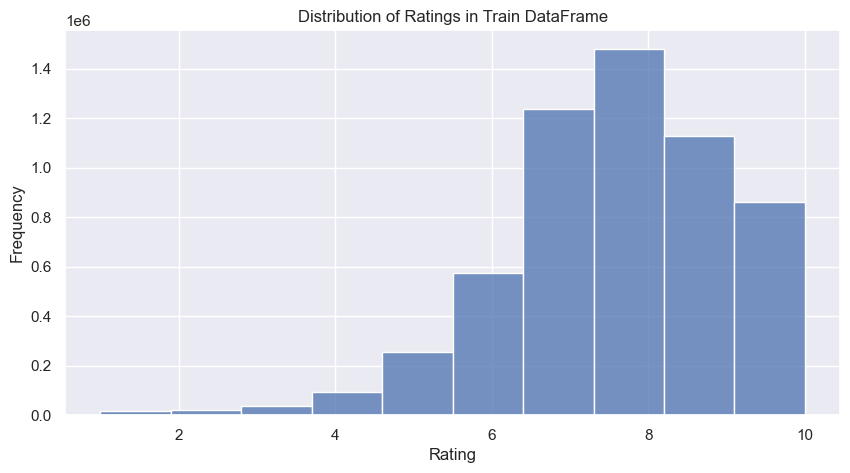

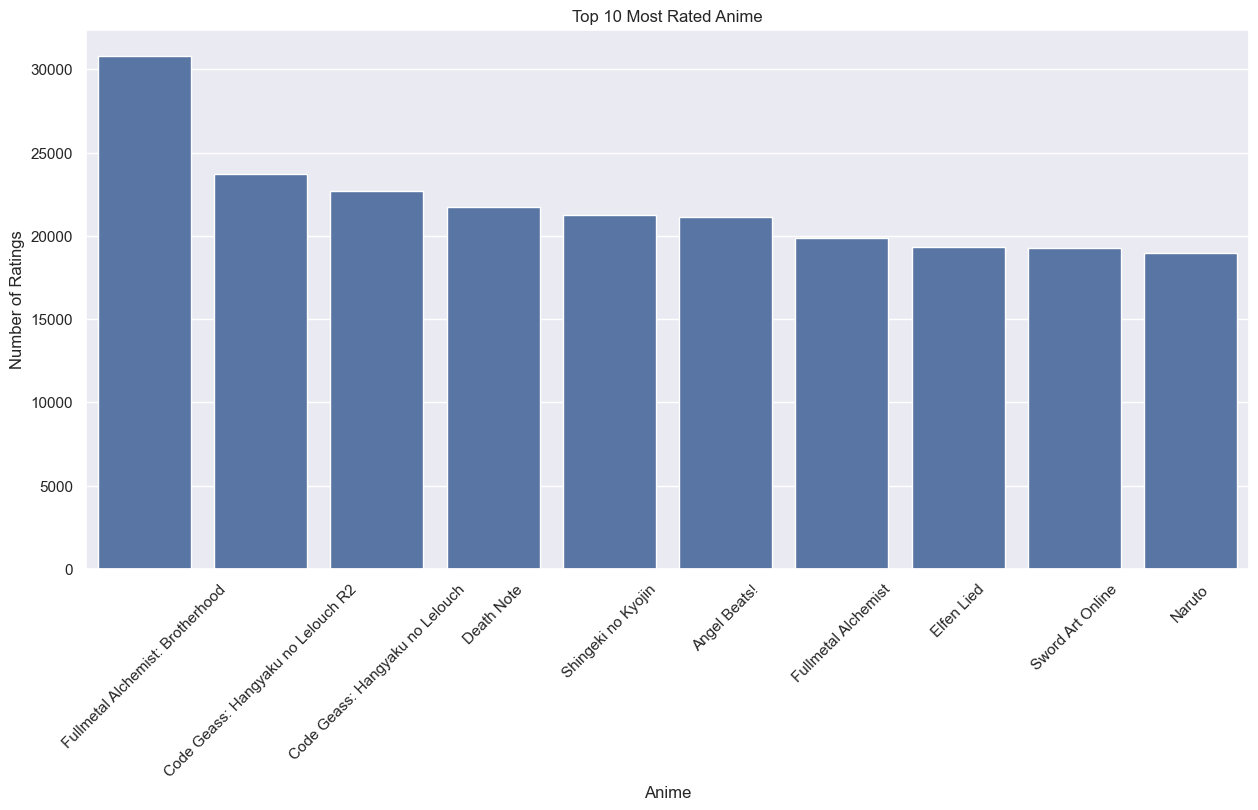

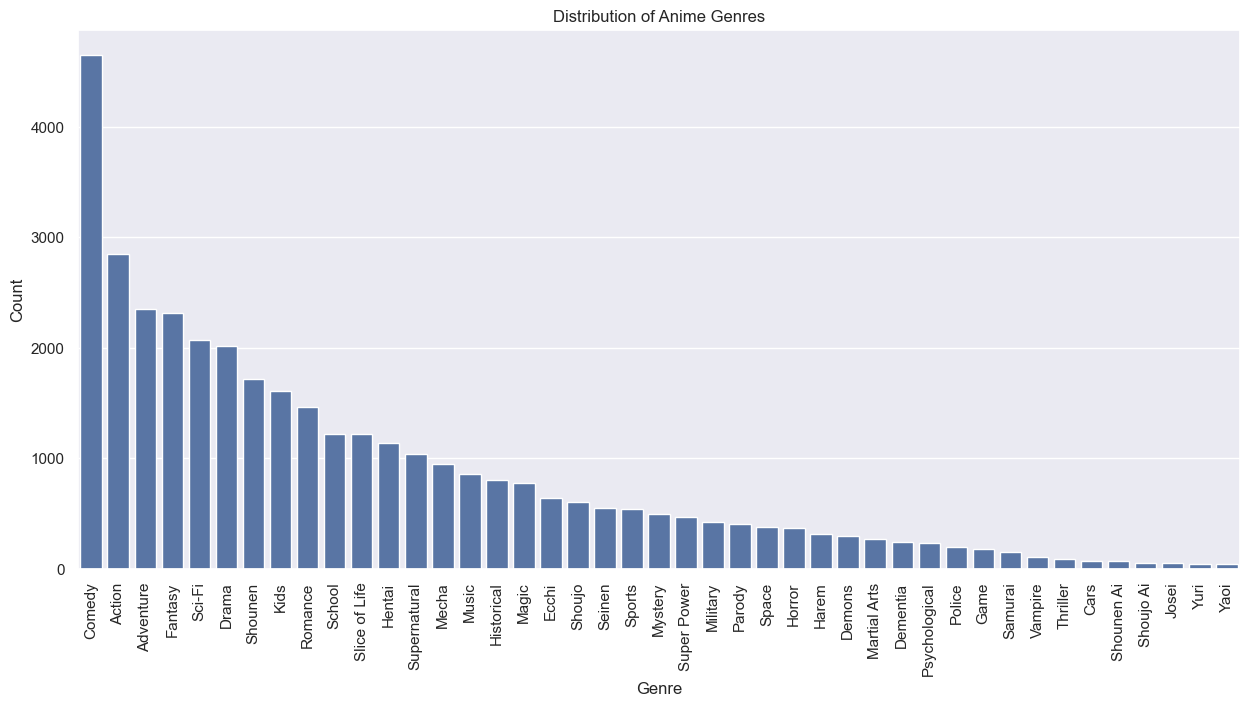

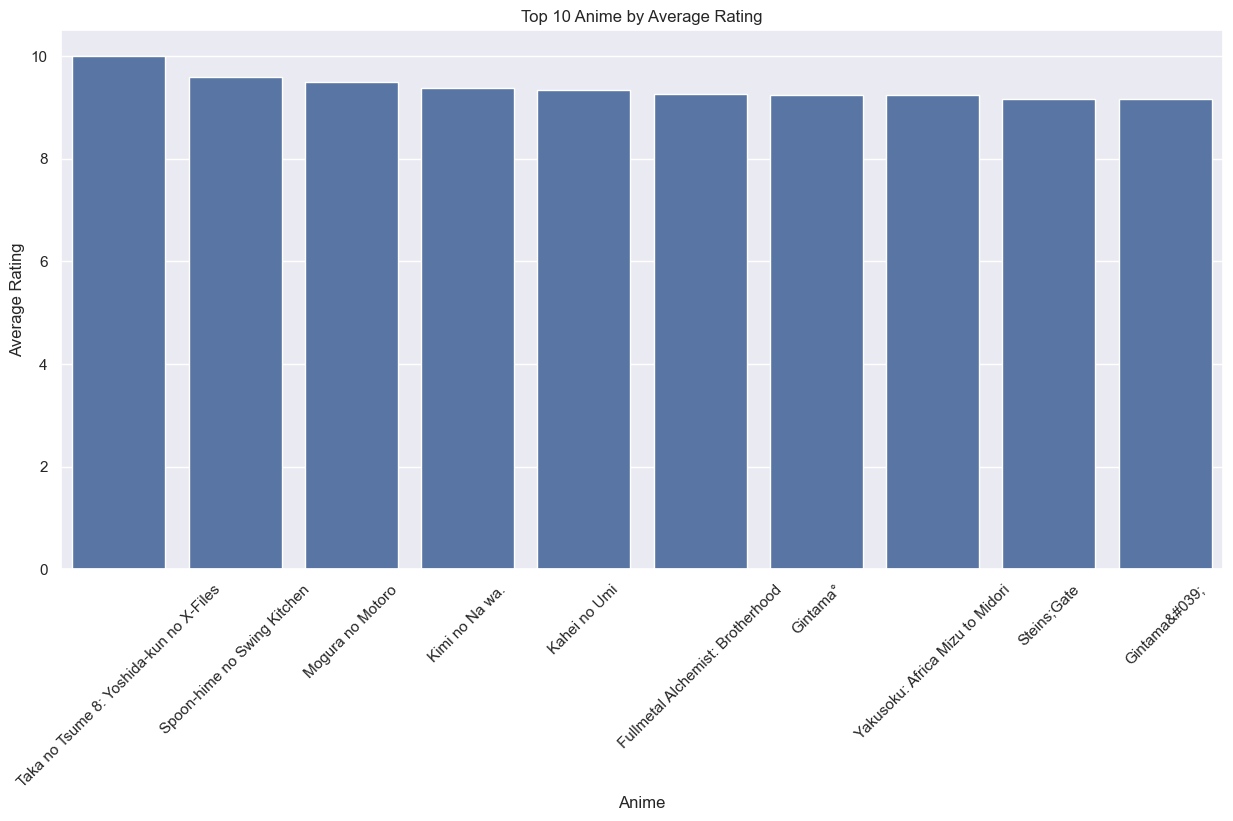

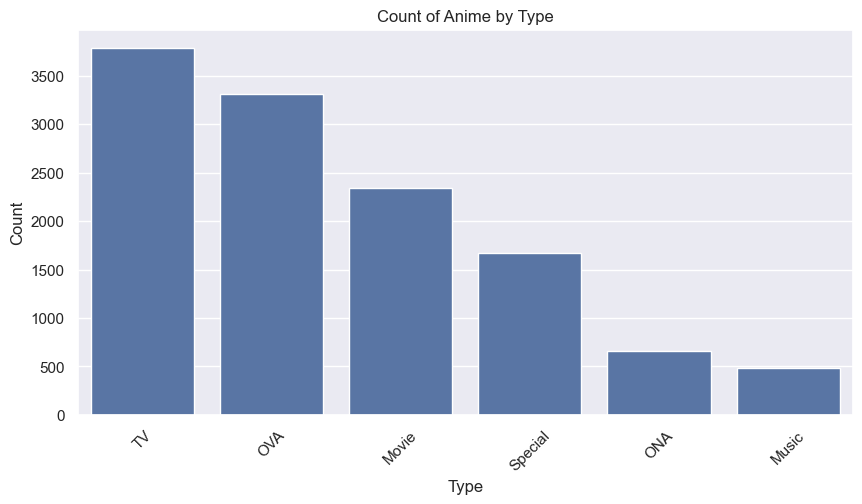

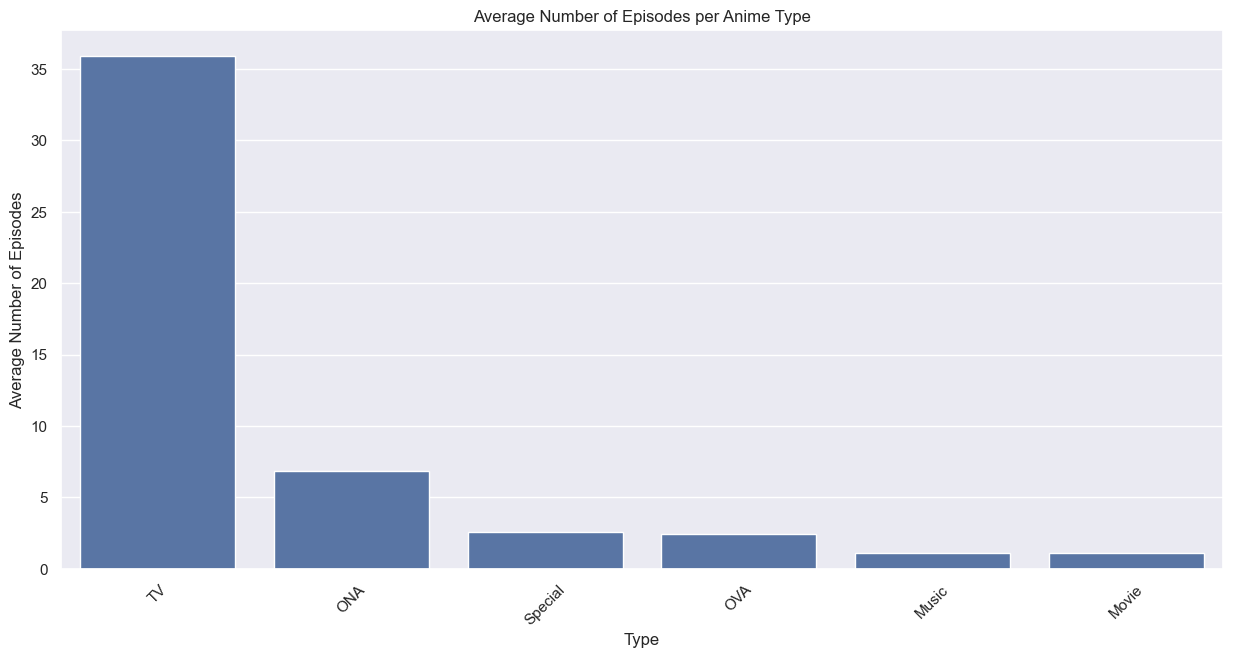

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframes
# Replace 'your_train_data.csv' with the actual path to your train data file
train_df = pd.read_csv('anime-recommender-system-project-2024/train.csv')

# Load test_df and anime_df similarly if needed
test_df = pd.read_csv('anime-recommender-system-project-2024/test.csv') # Assuming you have a test.csv file
anime_df = pd.read_csv('anime-recommender-system-project-2024/anime.csv') # Assuming you have a anime.csv file

# Display basic information and statistics
print("Train DataFrame Info")
print(train_df.info())
print(train_df.describe())

print("\nTest DataFrame Info")
print(test_df.info()) # Use test_df instead of test.csv
print(test_df.describe()) # Use test_df instead of test.csv

print("\nAnime DataFrame info")
print(anime_df.info()) # Use anime_df instead of anime.csv
print(anime_df.describe()) # Use anime_df instead of anime.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframes (assuming they are already loaded as train_df, test_df, and anime_df)

# Display basic information and statistics
print("Train DataFrame Info")
print(train_df.info())
print(train_df.describe())

print("\nTest DataFrame Info")
print(test_df.info())
print(test_df.describe())

print("\nAnime DataFrame Info")
print(anime_df.info())
print(anime_df.describe())

# Checking for missing values in anime_df
print("\nMissing values in anime_df:")
print(anime_df.isnull().sum())

# Distribution of ratings in train_df
plt.figure(figsize=(10, 5))
sns.histplot(train_df['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings in Train DataFrame')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 most rated anime in train_df
top_rated_anime = train_df['anime_id'].value_counts().head(10)
top_rated_anime_names = anime_df[anime_df['anime_id'].isin(top_rated_anime.index)]['name']

plt.figure(figsize=(15, 7))
sns.barplot(x=top_rated_anime_names, y=top_rated_anime.values)
plt.title('Top 10 Most Rated Anime')
plt.xlabel('Anime')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

# Distribution of anime genres
plt.figure(figsize=(15, 7))
anime_genres = anime_df['genre'].dropna().str.split(', ', expand=True).stack().value_counts()
sns.barplot(x=anime_genres.index, y=anime_genres.values)
plt.title('Distribution of Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Average rating of anime
plt.figure(figsize=(15, 7))
average_anime_rating = anime_df[['name', 'rating']].dropna().sort_values(by='rating', ascending=False).head(10)
sns.barplot(x=average_anime_rating['name'], y=average_anime_rating['rating'])
plt.title('Top 10 Anime by Average Rating')
plt.xlabel('Anime')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Count of anime by type
plt.figure(figsize=(10, 5))
anime_type_count = anime_df['type'].value_counts()
sns.barplot(x=anime_type_count.index, y=anime_type_count.values)
plt.title('Count of Anime by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Average number of episodes per anime type
plt.figure(figsize=(15, 7))
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')  # Convert episodes to numeric, coerce errors
average_episodes = anime_df.groupby('type')['episodes'].mean().dropna().sort_values(ascending=False)
sns.barplot(x=average_episodes.index, y=average_episodes.values)
plt.title('Average Number of Episodes per Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Number of Episodes')
plt.xticks(rotation=45)
plt.show()

This code will generate the following visualizations:

Distribution of ratings in train_df.
Top 10 most rated anime in train_df.
Distribution of anime genres in anime_df.
Top 10 anime by average rating in anime_df.
Count of anime by type in anime_df.
Average number of episodes per anime type in anime_df.

These visualizations and summaries will provide a good starting point for understanding the data and preparing it for building the recommender system.

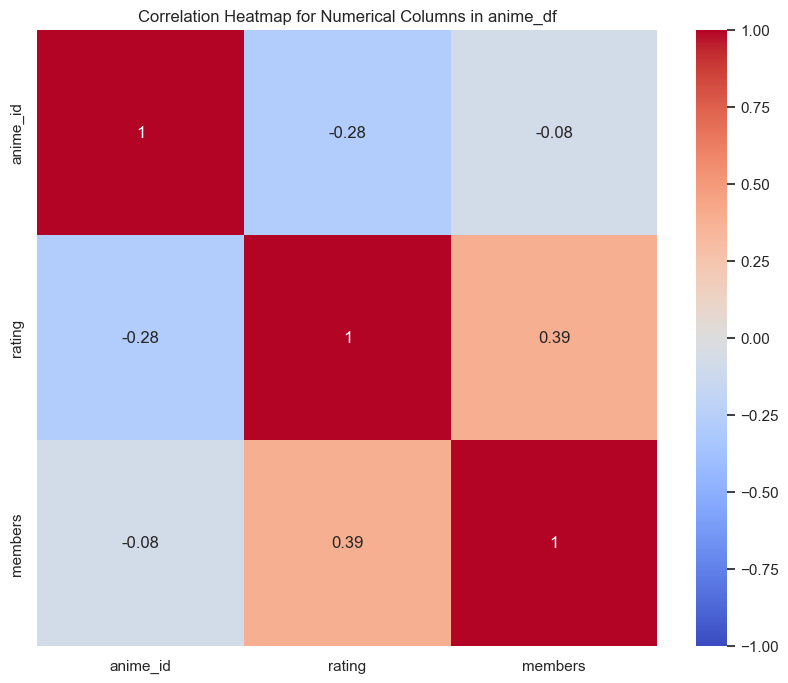

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming anime_df is already loaded

# Selecting numerical columns for correlation
numerical_cols = ['anime_id', 'rating', 'members']

# Calculating the correlation matrix
correlation_matrix = anime_df[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Columns in anime_df')
plt.show()

This code will produce a heatmap showing the correlations between anime_id, rating, and members in the anime_df DataFrame.

C:\Users\dell\AppData\Local\Temp\ipykernel_14864\1023846152.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




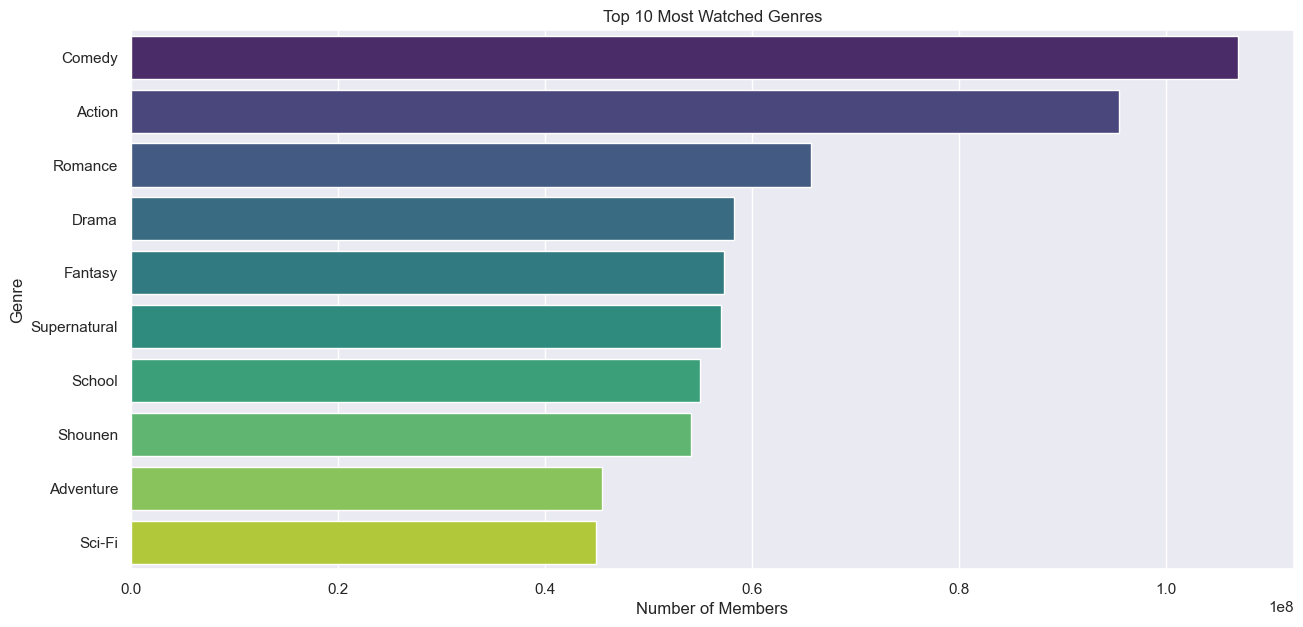

In [349]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming anime_df is already loaded

# Fill NaN values in the genre column with 'Unknown'
anime_df['genre'] = anime_df['genre'].fillna('Unknown')

# Split the genres into separate rows
genres_df = anime_df[['genre', 'members']].dropna()
genres_df = genres_df.assign(genre=genres_df['genre'].str.split(', '))
genres_df = genres_df.explode('genre')

# Aggregate the members count by genre
genre_watch_count = genres_df.groupby('genre')['members'].sum().reset_index()

# Sort the genres by the number of members in descending order
genre_watch_count = genre_watch_count.sort_values(by='members', ascending=False)

# Plot the top 10 most watched genres
plt.figure(figsize=(15, 7))
sns.barplot(x='members', y='genre', data=genre_watch_count.head(10), palette='viridis')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Number of Members')
plt.ylabel('Genre')
plt.show()

This code performs the following steps:

Fills NaN values in the genre column with 'Unknown' to handle missing values. Splits the genres into separate rows for proper aggregation. Aggregates the members count by genre. Sorts the genres by the number of members in descending order. Plots the top 10 most-watched genres using a bar plot.

This analysis will help understand which genres are the most popular among viewers based on the number of members.

The Elbow Method plot helps determine the optimal number of clusters by looking for the "elbow point" where the SSE (Sum of Squared Errors) starts to flatten.

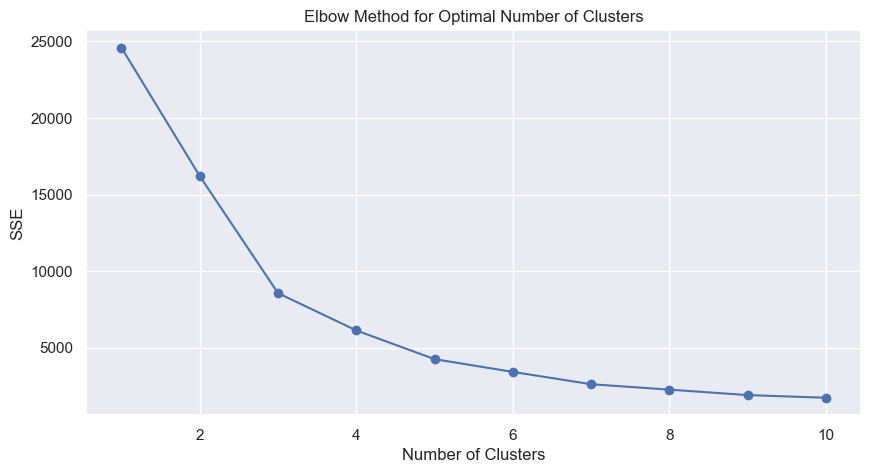

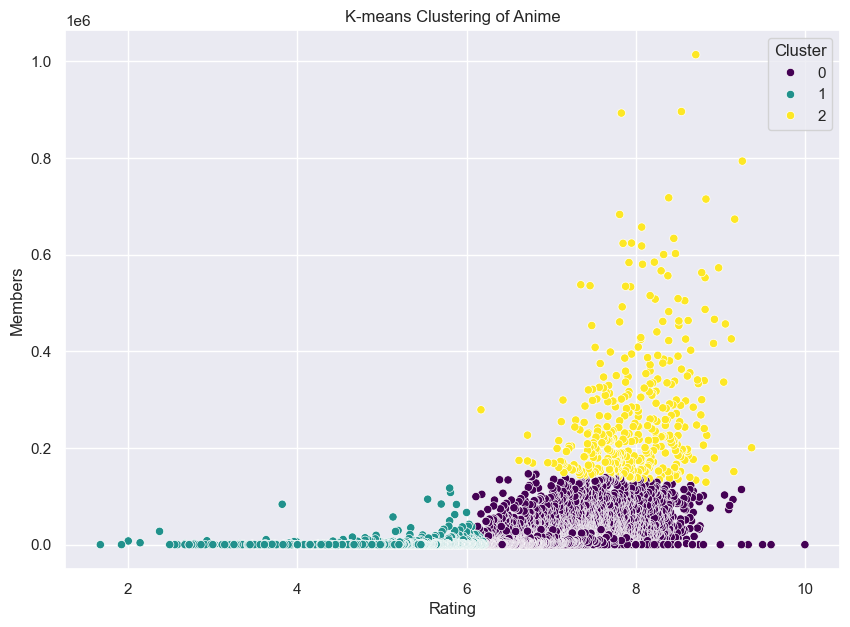

           rating        members
cluster                         
0        7.023402   15212.382560
1        5.376371    1240.570419
2        7.994400  266468.561170


In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming anime_df is already loaded

# Select numerical columns for clustering
# Instead of dropping NaN values, fill them with a suitable strategy
# For this example, we will fill missing rating with the mean rating and
# missing members with 0 (assuming no members means it's not popular)
cluster_data = anime_df[['rating', 'members']].fillna({'rating': anime_df['rating'].mean(), 'members': 0})

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determine the number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Fit K-means with the optimal number of clusters (e.g., 3 clusters)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# Predict clusters for the entire dataset (including rows with missing values)
anime_df['cluster'] = kmeans.fit_predict(cluster_data_scaled) # Use the filled data for clustering

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='rating', y='members', hue='cluster', palette='viridis', data=anime_df)
plt.title('K-means Clustering of Anime')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.legend(title='Cluster')
plt.show()

# Display the mean values for each cluster
cluster_means = anime_df.groupby('cluster')[['rating', 'members']].mean()
print(cluster_means)

The Elbow Method plot helps determine the optimal number of clusters by looking for the "elbow point" where the SSE (Sum of Squared Errors) starts to flatten.

From the plot, we can see that the anime are grouped, which helps in understanding the distribution and relationship between rating and popularity (members).

The scatter plot visualization helps in understanding how the clusters are distributed based on rating and members. Each point represents an anime, and the color indicates the cluster it belongs to.

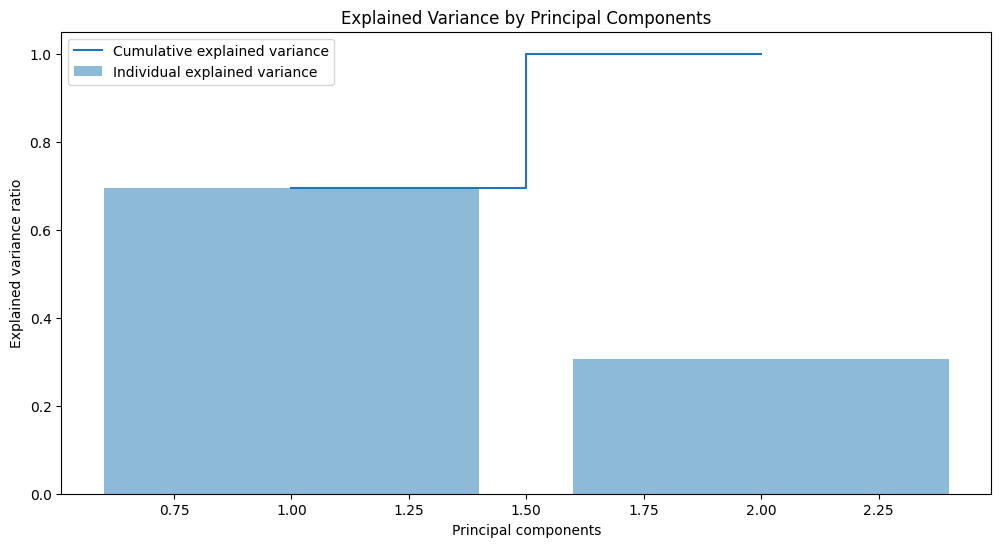

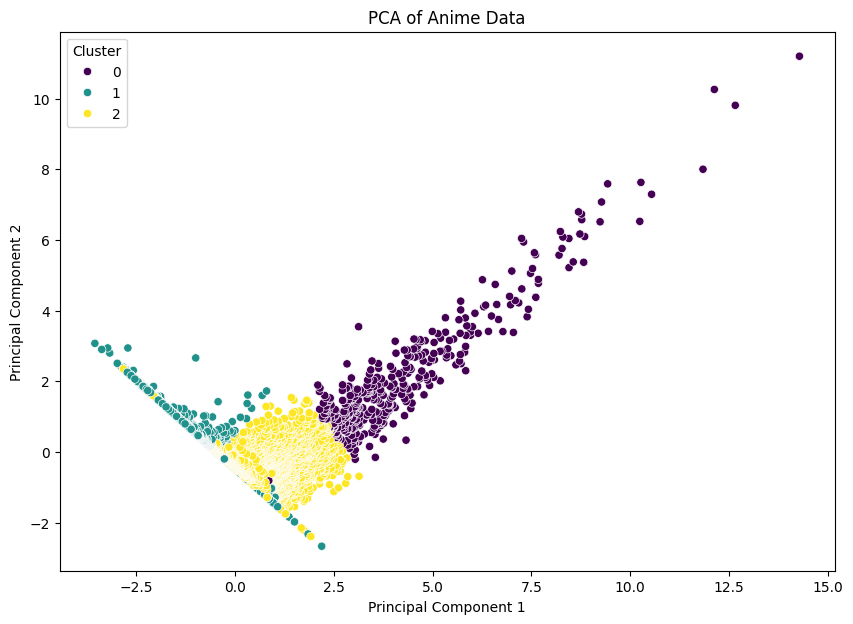

Loadings (coefficients of the original features in the principal components):
              PC1       PC2
rating   0.707107 -0.707107
members  0.707107  0.707107


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assuming anime_df is already loaded

# Select numerical columns for PCA
pca_data = anime_df[['rating', 'members']].dropna()

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA(n_components=None)  # None means we keep all components
principal_components = pca.fit_transform(pca_data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance and cumulative variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Add the cluster labels to the PCA DataFrame if clustering was performed
if 'cluster' in anime_df.columns:
    pca_df['cluster'] = anime_df.loc[pca_df.index, 'cluster']

# Visualize the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='viridis', data=pca_df)
plt.title('PCA of Anime Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Loadings (coefficients of the original features in the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])], index=['rating', 'members'])
print("Loadings (coefficients of the original features in the principal components):")
print(loadings)

Variance Explained: PC1 explains a large portion of the variance, indicating that a significant amount of information in the dataset can be captured by this single component. PC2 adds additional explanatory power.
Feature Contributions: The loadings indicate the relative importance of the original features in each principal component. Understanding these contributions helps interpret the principal components in terms of the original features.
Clusters Visualization: The scatter plot of the principal components can reveal patterns and separations that may correspond to underlying clusters in the data.

### **Conclusions and Insights**